## Installation
## Load the Sonar sonar_dataset set

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

sonar_dataset = pd.read_csv('dataset_40_sonar.csv', sep=',') #Loading the dataset

In [2]:
# Checking if my GPU is detected.

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensorflow version: 2.8.0
Keras Version: 2.8.0
GPU is available


In [3]:
# I just want to display all the truncated items.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

## Data Analysis and Preparation

In [4]:
#View First 21 Rows.
sonar_dataset.head(21)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,Rock
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,

In [5]:
#Original Datasets

def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(sonar_dataset.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

show_info(sonar_dataset)

DATASET SHAPE:  (208, 61) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208

In [6]:
#Display summary statistics for dataframe's numeric columns.
#I chose to display extra features as it helps to detect outliers.

sonar_dataset.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T



,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
attribute_1,208.0,0.029164,0.022991,0.0015,0.00937,0.013350,0.02280,0.035550,0.05471,0.072750,0.114566,0.1371
attribute_2,208.0,0.038437,0.032960,0.0006,0.00902,0.016450,0.03080,0.047950,0.08119,0.106825,0.155328,0.2339
attribute_3,208.0,0.043832,0.038428,0.0015,0.00997,0.018950,0.03430,0.057950,0.08420,0.118995,0.166297,0.3059
attribute_4,208.0,0.053892,0.046528,0.0058,0.01410,0.024375,0.04405,0.064500,0.10836,0.135970,0.172696,0.4264
attribute_5,208.0,0.075202,0.055552,0.0067,0.02164,0.038050,0.06250,0.100275,0.14006,0.171315,0.255919,0.4010
attribute_6,208.0,0.104570,0.059105,0.0102,0.03892,0.067025,0.09215,0.134125,0.17922,0.219660,0.275887,0.3823
attribute_7,208.0,0.121747,0.061788,0.0033,0.05366,0.080900,0.10695,0.154000,0.20643,0.228965,0.301544,0.3729
attribute_8,208.0,0.134799,0.085152,0.0055,0.05024,0.080425,0.11210,0.169600,0.23689,0.299940,0.425927,0.4590
attribute_9,208.0,0.178003,0.118387,0.0075,0.05980,0.097025,0.15225,0.233425,0.31102,0.374775,0.573840,0.6828
attribute_10,208.0,0.208259,0.134416,0.0113,0.07477,0.111275,0.18240,0.268700,0.38013,0.482690,0.617804,0.7106


<AxesSubplot:xlabel='Class', ylabel='count'>

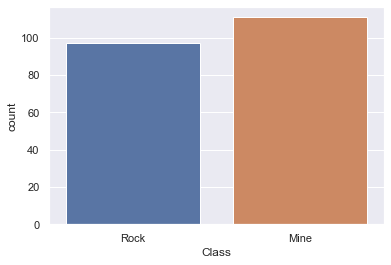

In [7]:
sns.countplot('Class',data=sonar_dataset) # Mine(M) Class has more in number (Original dataset)

In [8]:
X = sonar_dataset.drop('Class',axis=1)
y = sonar_dataset.Class

In [9]:
y.replace({'Rock':1,'Mine':0},inplace=True)
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [10]:
y.value_counts()

0    111
1    97 
Name: Class, dtype: int64

# Creation of ANN

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

# Model 1
### Binary_Crossentropy | Adam

In [13]:
model = keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, shuffle=True)


test_loss, test_error = model.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test error: {:.4f}'.format(test_error))

Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.4924 - val_loss: 0.6839 - val_accuracy: 0.6176
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6136 - val_loss: 0.6660 - val_accuracy: 0.5588
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.6894 - val_loss: 0.6215 - val_accuracy: 0.6765
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.6742 - val_loss: 0.6074 - val_accuracy: 0.8235
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7197 - val_loss: 0.5899 - val_accuracy: 0.7647
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7803 - val_loss: 0.5462 - val_accuracy: 0.8529
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7576 - val_loss: 0.5192 - val_accuracy: 0.7059
Epoch 8/100


### Note that above our accuracy is 100% in training set but below our accuracy is low in testing set, 
### that means our model is overfitted, I will use drop regularization here.


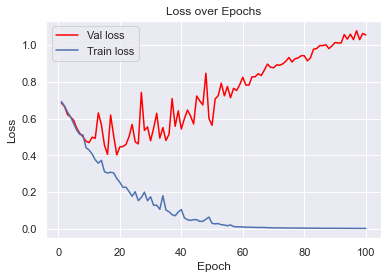

In [14]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history) 
plt.savefig('Loss_BC_Adam_Model1.png')

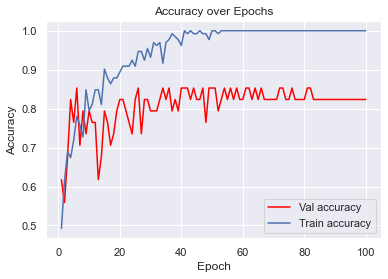

In [15]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy(history)
plt.savefig('Acc_BC_Adam_Model1.png')

# Model 2
### Binary_Crossentropy | Adam | Dropout

In [37]:
# now we will use drop out regularization by randomly drop our neurons

model2 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.6), # drop 50% of our neurons chosen randomly
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, shuffle=True)

test_loss2, test_error2 = model2.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss2))
print('Test error: {:.4f}'.format(test_error2))

Epoch 1/100
33/33 [==============================] - 1s 11ms/step - loss: 0.7509 - accuracy: 0.5303 - val_loss: 0.6890 - val_accuracy: 0.5294
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.7402 - accuracy: 0.5530 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7502 - accuracy: 0.5227 - val_loss: 0.6878 - val_accuracy: 0.5588
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.5152 - val_loss: 0.6964 - val_accuracy: 0.3529
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.7499 - accuracy: 0.4924 - val_loss: 0.6853 - val_accuracy: 0.4118
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7196 - accuracy: 0.4621 - val_loss: 0.6808 - val_accuracy: 0.6471
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.5985 - val_loss: 0.6800 - val_accuracy: 0.7059
Epoch 8/100


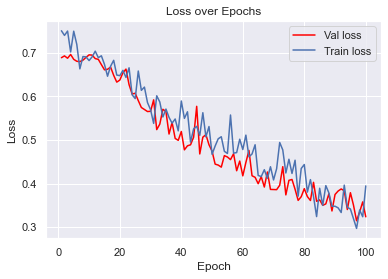

In [38]:
def plot_loss(history_2):
    train_loss = history_2.history['loss']
    test_loss = history_2.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history2)
plt.savefig('Loss_BC_Adam_Dropout_Model2.png') 

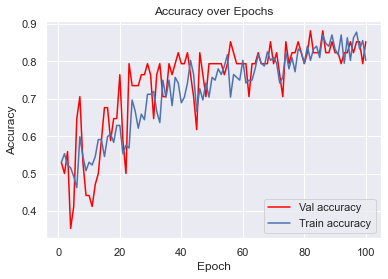

In [39]:
def plot_accuracy_2(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy_2(history2)
plt.savefig('Acc_BC_Adam_Dropout_Model2.png') 